## Exploratory Data Analysis ##

### Implement EDA by multivariate visualization ###


__Start by importing all necessary libraries and load the data__

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.shape

(303, 14)

__Checking for null values and duplicates__

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
data = data.drop_duplicates()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
age         302 non-null int64
sex         302 non-null int64
cp          302 non-null int64
trestbps    302 non-null int64
chol        302 non-null int64
fbs         302 non-null int64
restecg     302 non-null int64
thalach     302 non-null int64
exang       302 non-null int64
oldpeak     302 non-null float64
slope       302 non-null int64
ca          302 non-null int64
thal        302 non-null int64
target      302 non-null int64
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


__There were no null values, and one value was dropped as a duplicate.__

### Visualize the data as histograms ###

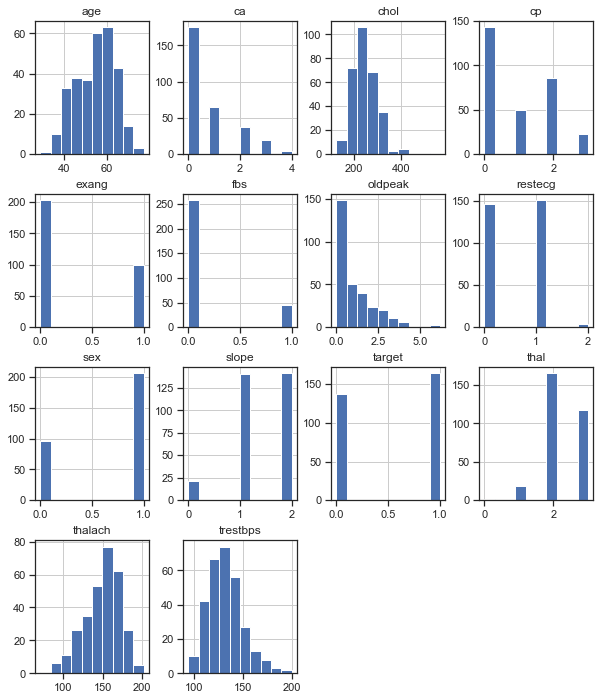

In [10]:
data.hist(figsize=(10,12));

__Viewing potential outiers and their individual rows to determine how to handle them__

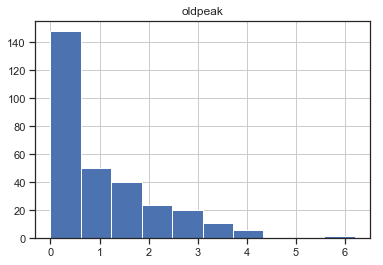

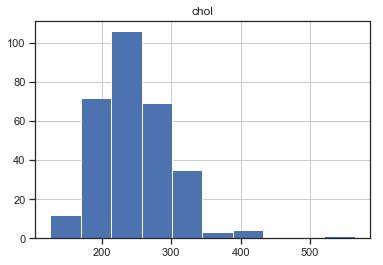

In [11]:
data.hist('oldpeak');
data.hist('chol');

In [12]:
old1 = data['oldpeak'] > 5
chol1 = data['chol'] > 500
data_old1 = data[old1]
data_chol1 = data[chol1]

data_old1.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0


In [13]:
data_chol1.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


The datapoints that appeared to be outliers seem to generally fit into the realm of reality with this dataset, so I am leaving them in the set for modeling.

__Creating a correlation heatmap to explore relationships__

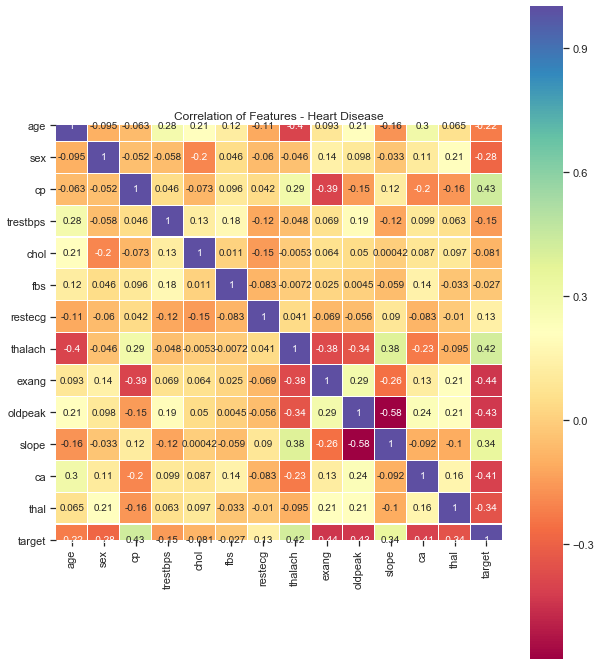

In [6]:
corr = data.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap='Spectral', square=True, ax=ax, annot=True, linewidth=0.1)
plt.title('Correlation of Features - Heart Disease', y=1.05, size=12);

* slope and oldpeak have the strongest inverse correlation
* thalach and target have the strongest correlation

The data is not strongly correlated

## Taking a closer look at some of the data to see how it correlates with other features ##

In [15]:
sns.set_palette('nipy_spectral', 2)

Viewing how many of each sex were represented in this study. Females = 0, Males = 1

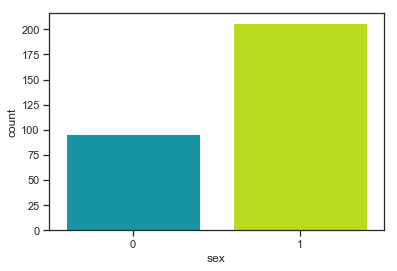

In [16]:
sns.countplot(data.sex)
plt.show();

In [17]:
male_count = len(data[data['sex']==1])
female_count = len(data[data['sex']==0])
print("Male Count:", male_count, "; " "{:.2f}%".format((male_count/len(data)*100)), "of total sample")
print("Female Count:", female_count, "; " "{:.2f}%".format((female_count/len(data)*100)), "of total sample")

Male Count: 206 ; 68.21% of total sample
Female Count: 96 ; 31.79% of total sample


Checking the counts of chest pain reports by sex with the following pain chart.

0. Typical Angina
1. Atypical Angina
2. Non-Anginal Pain
3. Asymptomatic

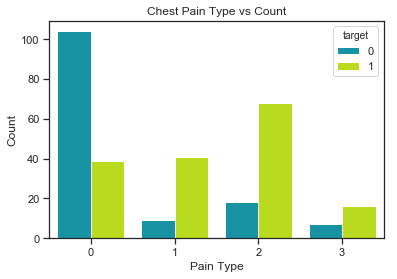

In [18]:
sns.countplot(x=data.cp, hue=data.target)
plt.xlabel('Pain Type')
plt.ylabel('Count')
plt.title('Chest Pain Type vs Count')
plt.show();

lmplot to show the linear relationships of chol and trestbps using cp (chest pain) as a measure. It appears that those that reported cp = 3 (asymptomatic) had a strong correlation between their cholesterol and trestbps.

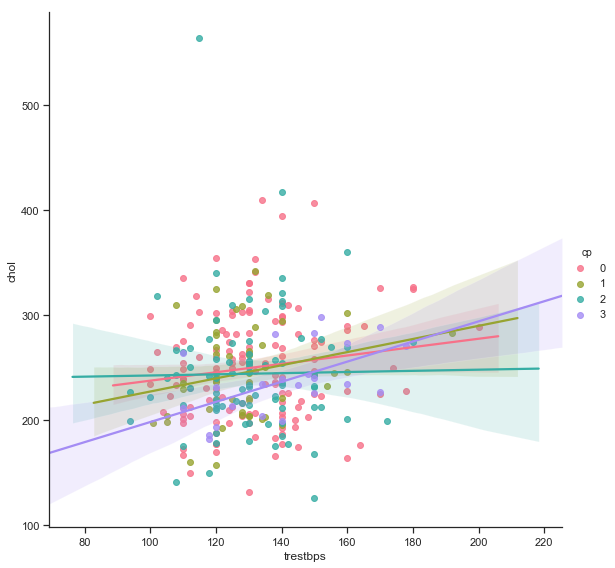

In [19]:
sns.lmplot(x='trestbps', y='chol', data=data, hue='cp', height=8)
plt.show();

A violin plot to show those diagnosed with heart disease and their measured oldpeak (ST depression induced by exercise relative to rest). These are organized by sex with Females = 0, Males = 1

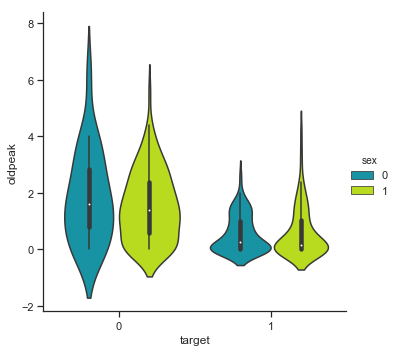

In [20]:
sns.catplot(x='target', y='oldpeak', kind='violin', hue='sex', data=data);

A violin plot to compare what sex reported what type of chest pain. These are organized by Target, with no heart disease = 0 and heart disease = 1.

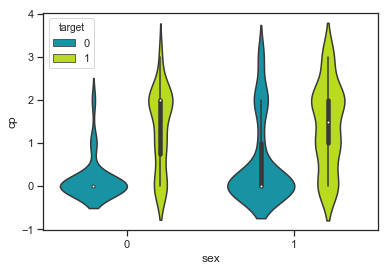

In [21]:
sns.violinplot(x='sex', y='cp', hue='target', data=data, height=7);

A violin plot to show the count of those diagnosed with heart disease by age and organized by sex.

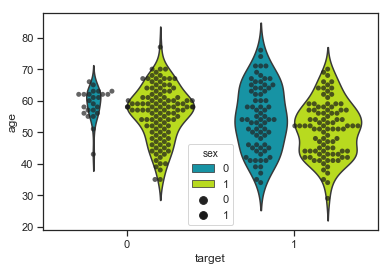

In [22]:
sns.violinplot(x='target', y='age', hue='sex', data=data, scale='count', inner=None);
sns.swarmplot(x='target', y='age', hue='sex', data=data, dodge=True, color='k', alpha=0.7);

A breakdown of some stats comparing males and females and heart disease rates.

In [26]:
male = data[data.sex == 1]
female = data[data.sex ==0]
male_phd = (male['target'] == 1).sum()
female_phd = (female['target'] == 1).sum()

male_per = male_phd / male_count
female_per = female_phd / female_count

print("males diagnosed with heart disease:", male_phd)
print("females diagnosed with heart disease:", female_phd)
print("{:.2f}%".format(male_per*100), "of all males tested were diagnosed with heart disease")
print("{:.2f}%".format(female_per*100), "of all females tested were diagnosed with heart disease")
print("{:.2f}%".format((male_phd/302*100) + (female_phd/302*100)), "of all people tested were diagnosed with heart disease")

males diagnosed with heart disease: 92
females diagnosed with heart disease: 72
44.66% of all males tested were diagnosed with heart disease
75.00% of all females tested were diagnosed with heart disease
54.30% of all people tested were diagnosed with heart disease
